In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [35]:
df = pd.read_csv('tested.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [33]:
table = pd.pivot_table(data=df,index=['Sex'])
table


,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,30.272362,49.747699,0.598684,2.144737,0.565789,1
male,30.272732,27.527877,0.274436,2.334586,0.379699,0


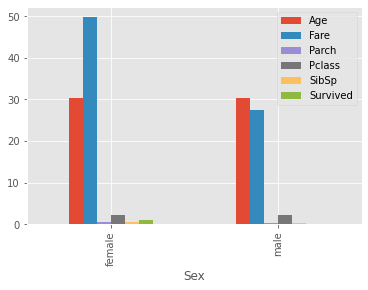

In [14]:
table.plot(kind='bar');


In [15]:

table = pd.pivot_table(df,index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       41.333333  115.591168  0.500000  0.560000         1
       2       24.376552   26.438750  0.766667  0.533333         1
       3       23.073400   13.735129  0.597222  0.583333         1
male   1       40.520000   75.586551  0.280702  0.403509         0
       2       30.940678   20.184654  0.142857  0.301587         0
       3       24.525104   11.826350  0.328767  0.404110         0

In [16]:

table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table


Age  Survived
Sex    Pclass                     
female 1       41.333333        50
       2       24.376552        30
       3       23.073400        72
male   1       40.520000         0
       2       30.940678         0
       3       24.525104         0

In [17]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table


Survived
Sex    Pclass          
female 1              1
       2              1
       3              1
male   1              0
       2              0
       3              0

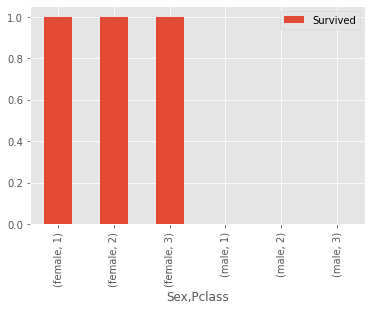

In [18]:

table.plot(kind='bar');


In [19]:

table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table


Survived        
Pclass        1   2   3
Sex                    
female       50  30  72
male          0   0   0

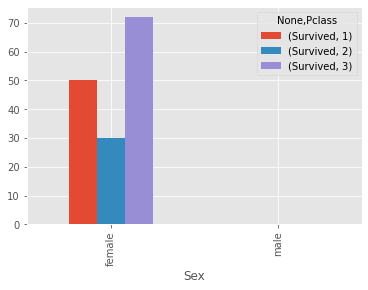

In [20]:
table.plot(kind='bar');

In [21]:

table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table


Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 1        1       41.000000  37.000000  42.000000
                2       19.750000        NaN  25.116800
                3       24.166667  25.681818  22.005152
male   0        1       39.962963        NaN  41.173913
                2       29.400000  52.666667  29.813725
                3       22.423077  23.928571  24.939605

In [24]:
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 1        1       41.000000  37.000000  42.000000
                2       19.750000  30.272590  25.116800
                3       24.166667  25.681818  22.005152
male   0        1       39.962963  30.272590  41.173913
                2       29.400000  52.666667  29.813725
                3       22.423077  23.928571  24.939605